# ANATOMY OF A NEURAL NETWORK
![title](./pics/neural-net.png)

In [1]:
# imports

# keras imports
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import imdb
from keras.datasets import reuters
from keras.preprocessing import sequence
from keras.datasets import boston_housing
from keras.utils.np_utils import to_categorical


# general imports
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown #just to display markdown

Using TensorFlow backend.


## AUTOMATIC SHAPE INFERENCE 
 
The layers that you add to keras models are dynamically built to match the shape of the incoming layer.

In [2]:
display(Markdown("#### After first layers' {None,32} dimension(None stands for number of examples in batch), the input shape of next layer is automatically interpreted")) 
# A dense layer with 6 output units
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(6))
model.summary()

#### After first layers' {None,32} dimension(None stands for number of examples in batch), the input shape of next layer is automatically interpreted

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 25,318
Trainable params: 25,318
Non-trainable params: 0
_________________________________________________________________


#### In Keras models can be developed either by using Sequential model or Functional API's

Lets build model below using both the metheodologies
![title](./pics/model-architecture.png)


## A network definition using the Sequential model

In [3]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## A network definition using the functional API

In [4]:
input_tensor = layers.Input(shape=(10000,))
x = layers.Dense(16, activation='relu')(input_tensor)
x = layers.Dense(16, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(input_tensor, output_tensor)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Defining a loss function and an optimizer

In [5]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Data preparation

IMDB data encoding from text will be extensively covered in "text_pre-processing_basic model_building" 

In [6]:
# pre-processing initializations
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

# data pre-prcessing
### IMDB data encoding from text will be extensively covered in "text_pre-processing_basic model_building" ##

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print ("before data preprocessing")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape, "\n")

print("\nImdb review 1 sample input data\n")
print(input_train[:1]) 

print("\nImdb review data lables")
print(y_train[:2])
print(
"""
Note:  
0 : "Negative review"
1 : "Positive review"
post_padding in input data helps gragient in LSTM flow better 

"""
)

Loading data...
before data preprocessing
input_train shape: (25000,)
input_test shape: (25000,) 


Imdb review 1 sample input data

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38

### There are two ways we could do that:

- We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).

- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

#### We will go with the latter solution

## Encoding the integer sequences into a binary matrix

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(input_train)

# Our vectorized test data
x_test = vectorize_sequences(input_test)

# Our vectorized labels
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

print("\n Sample input data after encoding\n")
print(x_train[:1]) 

print("\nImdb review data lables after encoding")
print(x_test[:2])


 Sample input data after encoding

[[0. 1. 1. ... 0. 0. 0.]]

Imdb review data lables after encoding
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


## Setting aside a validation set

In [8]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

## Training our model

In [9]:
 history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.4956 - acc: 0.7883 - val_loss: 0.3763 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.2895 - acc: 0.9036 - val_loss: 0.3044 - val_acc: 0.8831
Epoch 3/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.2107 - acc: 0.9309 - val_loss: 0.2746 - val_acc: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1686 - acc: 0.9450 - val_loss: 0.2763 - val_acc: 0.8887
Epoch 5/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.1347 - acc: 0.9579 - val_loss: 0.2818 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1154 - acc: 0.9626 - val_loss: 0.2975 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.0950 - acc: 0.9721 - val_loss: 0.3176 - val_ac

## Plotting the training and validation loss & accuracy from model training history

Values captured in history: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


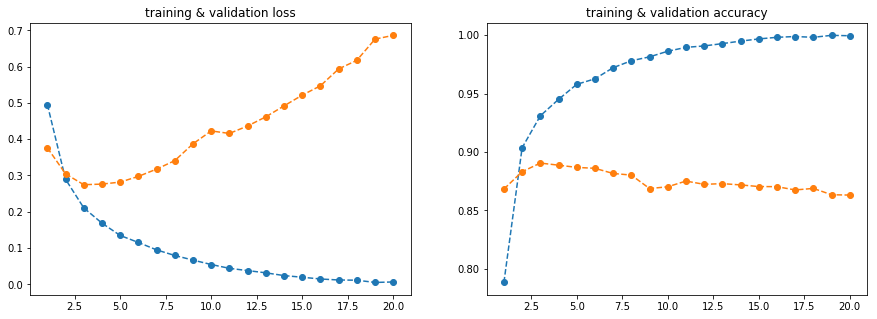

In [10]:
history_dict = history.history
print ("Values captured in history: {}".format(history_dict.keys()))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


# visualize model training
epochs = range(1, len(acc) + 1)
fig, axs = plt.subplots(1, 2,figsize=(15,5))
axs[0].plot(epochs, loss, '--o', label='Training loss')
axs[0].plot(epochs, val_loss, '--o', label='Validation loss')
axs[0].set_title('training & validation loss')
axs[1].plot(epochs, acc, '--o', label='Training acc')
axs[1].plot(epochs, val_acc, '--o', label='Validation acc')
axs[1].set_title('training & validation accuracy')
plt.show()
plt.close() 

## Generating predictions for new data

In [11]:
model.predict(x_test)

array([[9.546829e-03],
       [1.000000e+00],
       [9.582295e-01],
       ...,
       [5.933382e-04],
       [8.849446e-03],
       [8.673740e-01]], dtype=float32)

## Training a multi-class classification model on the reuters dataset

In [12]:
# Loading the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# Taking a look at the data
print ("\nbefore data preprocessing")
print('input_train shape:', train_data.shape)
print('input_test shape:', test_data.shape, "\n")

print("\nreuters dataset's 1 sample input data\n")
print(train_data[:1]) 

print("\nreuters dataset's 2 data lables")
print(train_labels[:2])

# pre-processing the dataset

# sentences pre-processing
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

print("\n reuters dataset's sample input data after encoding\n")
print(x_train[:1]) 

print("\nreuters dataset's lables after encoding")
print(x_test[:2])

# lables one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

# keras one-liner (lables one-hot encoding)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


# model architecture development
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling our model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


before data preprocessing
input_train shape: (8982,)
input_test shape: (2246,) 


reuters dataset's 1 sample input data

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])]

reuters dataset's 2 data lables
[3 4]

 reuters dataset's sample input data after encoding

[[0. 1. 1. ... 0. 0. 0.]]

reuters dataset's lables after encoding
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


## Training model on reuter dataset

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=12,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 1s 160us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/12
7982/7982 [==============================] - 1s 65us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/12
7982/7982 [==============================] - 1s 63us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/12
7982/7982 [==============================] - 1s 63us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/12
7982/7982 [==============================] - 1s 63us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/12
7982/7982 [==============================] - 1s 63us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/12
7982/7982 [==============================] - 1s 64us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9086 - val_acc: 0.8020
Epoch 

## Plotting the training and validation loss & accuracy

In [23]:
history_dict = history.history
print ("Values captured in history: {}".format(history_dict.keys()))


def plot_model_training_history(history_dict, plot_val=True):
    acc = history_dict['acc']
    loss = history_dict['loss']
    
    if plot_val:
        val_acc = history_dict['val_acc']
        val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    # visualize model training
    epochs = range(1, len(acc) + 1)
    fig, axs = plt.subplots(1, 2,figsize=(15,5))
    axs[0].plot(epochs, loss, '--o', label='Training loss')
    if plot_val:
        axs[0].plot(epochs, val_loss, '--o', label='Validation loss')
        axs[0].set_title('training & validation loss')
    else:
        axs[0].set_title('training loss')
                               
    axs[1].plot(epochs, acc, '--o', label='Training acc')
    if plot_val:
        axs[1].plot(epochs, val_acc, '--o', label='Validation acc')
        axs[1].set_title('training & validation accuracy')                      
    else:
        axs[1].set_title('training accuracy')                      

    plt.show()
    plt.close()

plot_model_training_history(history_dict=history.history)

Values captured in history: dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


KeyError: 'acc'

## Predicting house prices using regression model on the Boston Housing Price dataset

As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:
1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town. 13. % lower status of the population.

In [15]:

# Loading the Boston housing dataset
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

# Taking a look at the data
print ("before data preprocessing")
print('input_train shape:', train_data.shape)
print('input_test shape:', test_data.shape, "\n")

print("\nthe boston housing price dataset's 1 sample input data\n")
print(train_data[:1]) 

print("\nthe boston housing price dataset's 2 lables")
print(train_targets[:2])

# Preparing the data

# data normalization
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Building our network
def build_model():
    # Because we will need to instantiate
    # the same model multiple time,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

before data preprocessing
input_train shape: (404, 13)
input_test shape: (102, 13) 


the boston housing price dataset's 1 sample input data

[[  1.23247   0.        8.14      0.        0.538     6.142    91.7
    3.9769    4.      307.       21.      396.9      18.72   ]]

the boston housing price dataset's 2 lables
[15.2 42.3]


## Validating our approach using K-fold validation

In [16]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print ("Validation MAE scores for successive 'folds'".format(np.mean(all_scores)))

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
Validation MAE scores for successive 'folds'


## Saving the validation logs at each fold

In [17]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


## Building the history of successive mean K-fold validation scores & plotting

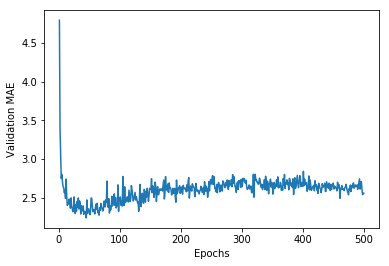

In [18]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Plotting validation scores - excluding the first 10 data points

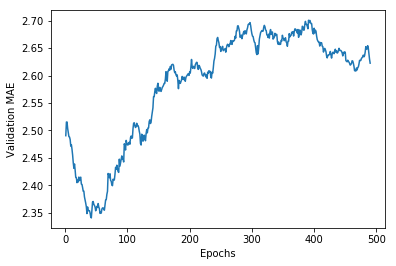

In [19]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training the final model

In [20]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 2ms/step


##  final result

In [21]:
print ("Final MAE on test data :{}".format(test_mae_score))

Final MAE on test data :2.67092872133442
